In [ ]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.IntervalData import IntervalData
from interClusLib.metric import *
from interClusLib.clustering import IntervalKMeans, IntervalAgglomerativeClustering
from interClusLib.visualization.HeatMap import HeatMap
from interClusLib.visualization import Interval2d, Interval3d ,IntervalParallelCoordinates ,IntervalRadarChart, Dendrogram

print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.make_interval_blobs(n_samples=30, n_clusters=4, n_dims = 3)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0         -7.570996        -2.981624         4.558679         5.020851   
1         -9.742430        -8.364626        -6.616443        -6.516443   
2         -9.399948        -9.149296        -7.254520        -7.154520   
3         -7.664244        -5.516438         6.984436         7.864612   
4          3.243451         6.597963        -4.265364        -3.553039   
5        -11.063311        -8.389156        -3.047904         0.135406   
6          1.409267         1.954916        -4.184880        -1.750847   
7          2.819259         4.828309        -5.093803        -3.741571   
8        -11.992285        -9.432415        -5.796334        -0.415347   
9        -12.242082        -8.670957        -4.026574        -1.712396   
10        -9.417173        -7.360732         3.603143         4.747

In [2]:
print(type(random_data))      
print(type(random_data.data))  
print(random_data.data.shape)  
print(random_data.get_intervals().shape[0])

<class 'interClusLib.IntervalData.IntervalData'>
<class 'pandas.core.frame.DataFrame'>
(30, 6)
30


30
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 1.46254128e-01
  8.43988266e-02 0.00000000e+00 0.00000000e+00 3.98182094e-02
  0.00000000e+00 0.00000000e+00 1.45076763e-01 0.00000000e+00
  5.90499906e-02 0.00000000e+00 0.00000000e+00 2.15291210e-01
  0.00000000e+00 0.00000000e+00 2.95169680e-02 9.91338480e-02
  3.98466263e-01 0.00000000e+00 3.79710967e-01 8.47170855e-02
  1.92829588e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.84920459e-01]
 [0.00000000e+00 1.00000000e+00 2.63589208e-01 0.00000000e+00
  0.00000000e+00 1.67152320e-01 0.00000000e+00 0.00000000e+00
  2.84862245e-02 9.21114216e-02 1.47310343e-01 1.31689875e-01
  1.32311186e-01 1.45866226e-01 1.20020336e-01 1.21270560e-01
  9.47596943e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 7.51650257e-02 0.00000000e+00 0.00000000e+00
  1.06528722e-01 0.00000000e+00 2.29651028e-01 2.36828699e-01
  2.56802852e-01 0.00000000e+00]
 [0.00000000e+00 2.63589208e-01 1.00000000e+00 0.00000000e+00
 

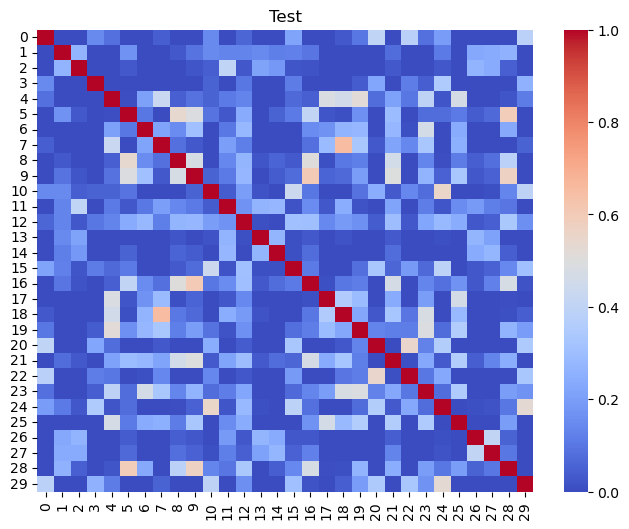

In [3]:
print(random_data.get_intervals().shape[0])

from interClusLib.metric import *
distance_matrix = pairwise_similarity(random_data.get_intervals(),"jaccard")

print(distance_matrix)

plt.figure(figsize=(8, 6))
HeatMap.draw_heat_map(distance_matrix, ax = None ,cmap = 'coolwarm', annot=False, cbar=True)
plt.title("Test")
plt.show()

In [ ]:
model = IntervalKMeans(n_clusters=4,max_iter=100,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())
print(model.labels_)

hmodel = IntervalAgglomerativeClustering(n_clusters=4, linkage='ward')
hmodel.fit(random_data.get_intervals())

print(hmodel.labels_)

dendrogram_data = hmodel.get_dendrogram_data()

# 绘制基本树形图
fig, ax = Dendrogram.visualize(dendrogram_data)

[1 0 0 1 3 1 2 3 1 1 1 0 1 0 0 1 1 3 2 2 1 1 1 2 1 3 0 0 1 1]
[3 0 0 3 1 2 1 1 2 2 3 0 2 0 0 3 2 1 1 1 3 2 3 1 3 1 0 0 2 3]


(<Figure size 1200x800 with 1 Axes>,
 <AxesSubplot:title={'center':'Parallel Coordinates'}>)

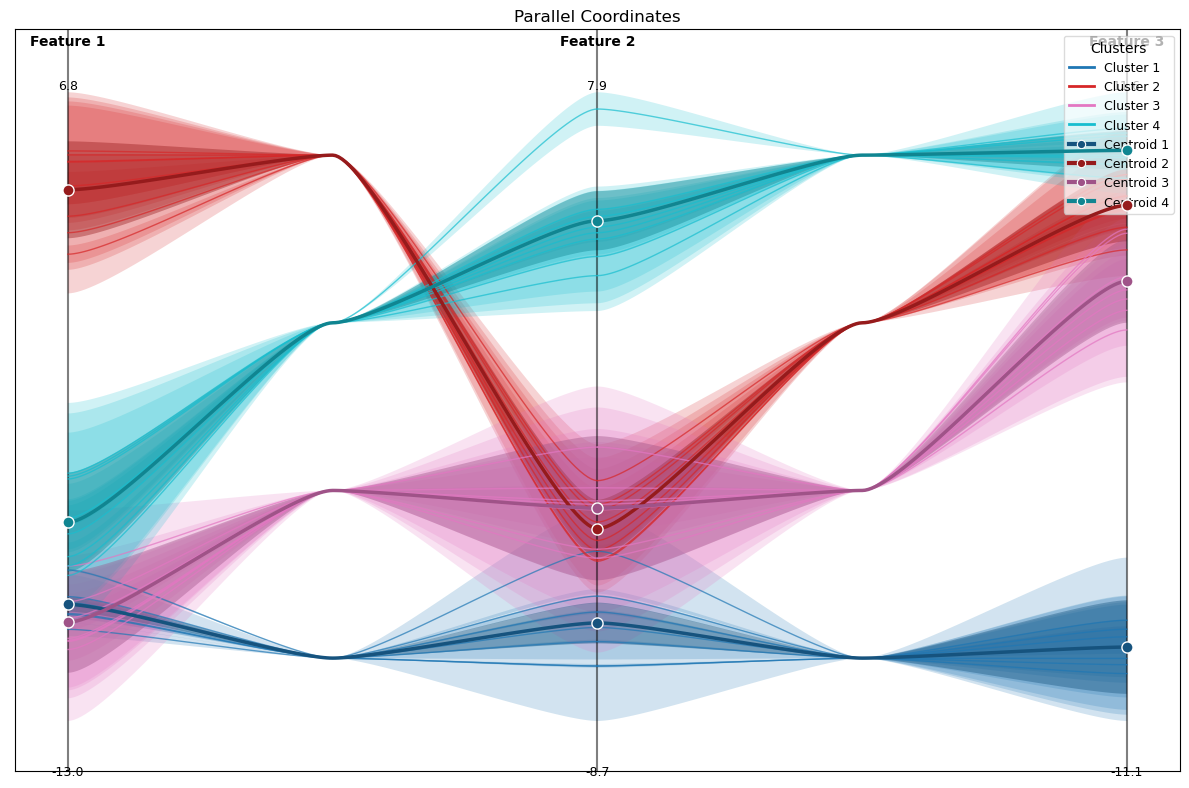

In [10]:

IntervalParallelCoordinates.visualize(intervals = random_data.get_intervals(), feature_names= None, centroids= hmodel.centroids_,labels=hmodel.labels_, beta = 1)


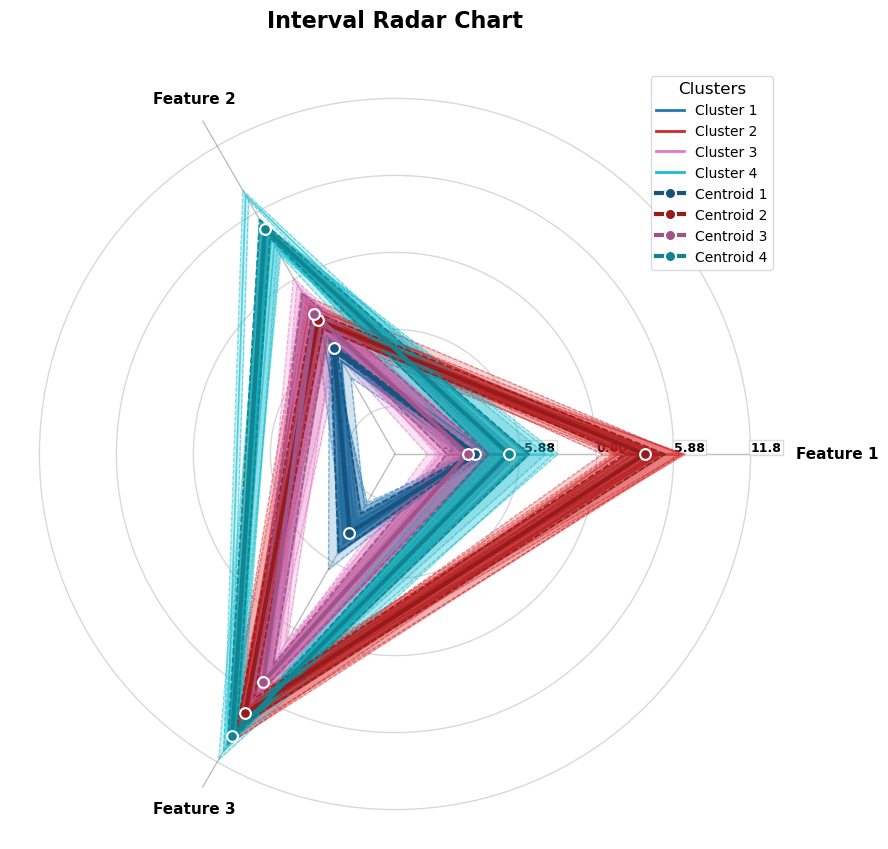

In [11]:
fig, ax = IntervalRadarChart.visualize(
    intervals=random_data.get_intervals(), 
    centroids=hmodel.centroids_,
    labels=hmodel.labels_, 
    title="Interval Radar Chart"
)

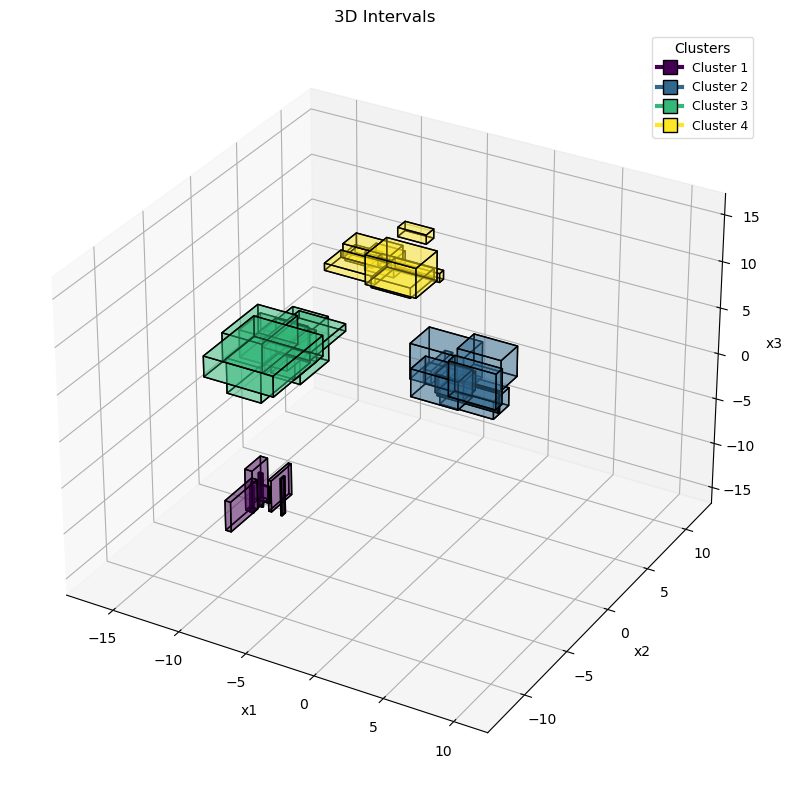

In [13]:
fig, ax = Interval3d.visualize(intervals = random_data.get_intervals(), centroids= None, labels = hmodel.labels_)


 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0         -7.570996        -2.981624         4.558679         5.020851   
1         -9.742430        -8.364626        -6.616443        -6.516443   
2         -9.399948        -9.149296        -7.254520        -7.154520   
3         -7.664244        -5.516438         6.984436         7.864612   
4          3.243451         6.597963        -4.265364        -3.553039   
5        -11.063311        -8.389156        -3.047904         0.135406   
6          1.409267         1.954916        -4.184880        -1.750847   
7          2.819259         4.828309        -5.093803        -3.741571   
8        -11.992285        -9.432415        -5.796334        -0.415347   
9        -12.242082        -8.670957        -4.026574        -1.712396   
10        -9.417173        -7.360732         3.603143         4.747464   
11        -9.355526        -9.138349        -5.309609        -3.072551   
12        -9.8

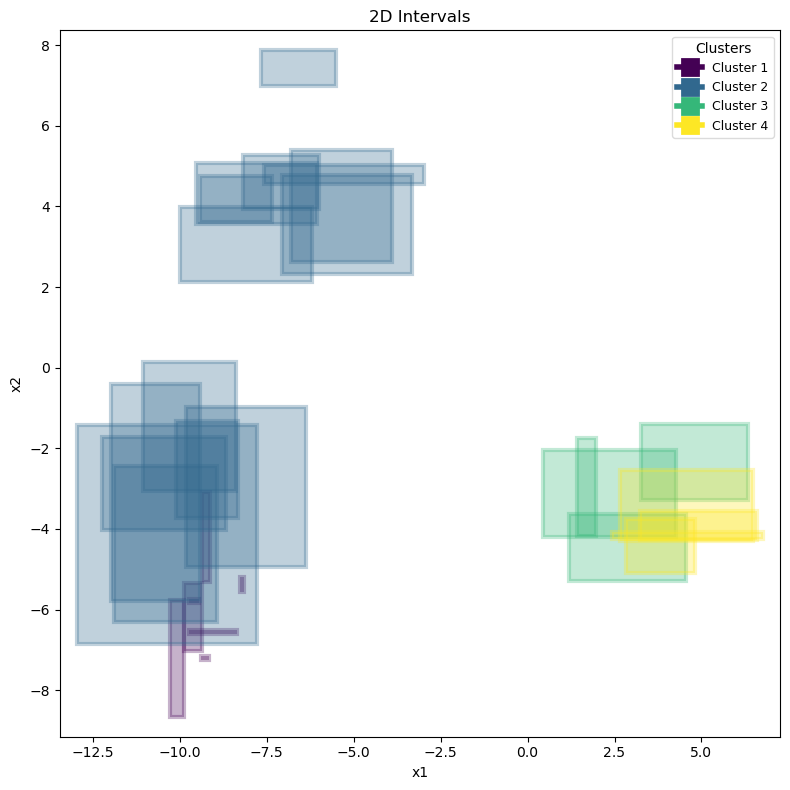

In [8]:

print("\n Random Interval Data:")
print(random_data.data)

model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())

fig, ax = Interval2d.visualize(intervals = random_data.get_intervals(), centroids= None, labels = model.labels_, fill_intervals=True)